In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

In [179]:
# 1. Load the dataset and explore the variables.

In [180]:
data = pd.read_csv("files_for_lab/customer_churn.csv")

In [181]:
display(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [182]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [183]:
data["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [184]:
data["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [185]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [186]:
# 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

In [187]:
# 3. Extract the target variable.
# 4. Extract the independent variables and scale them.

In [188]:
X = data[["tenure", "SeniorCitizen", "MonthlyCharges"]]
y = data["Churn"]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

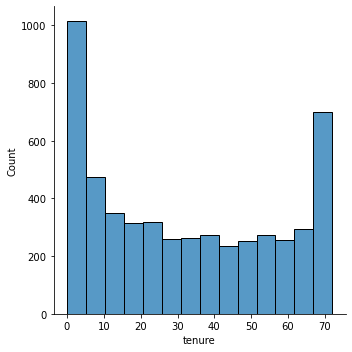

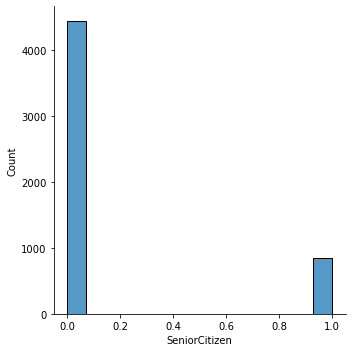

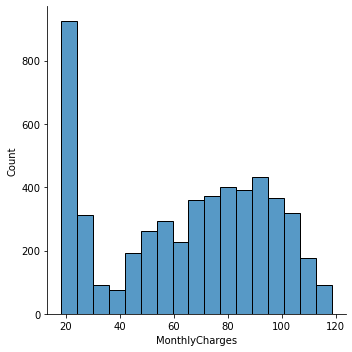

In [190]:
sns.displot(X_train["tenure"])
plt.show()

sns.displot(X_train["SeniorCitizen"])
plt.show()

sns.displot(X_train["MonthlyCharges"])
plt.show()

In [191]:
X_train_num = X_train.drop(columns=["SeniorCitizen"])
X_test_num = X_test.drop(columns=["SeniorCitizen"])
X_train_cat = X_train[["SeniorCitizen"]].reset_index(drop=True)
X_test_cat = X_test[["SeniorCitizen"]].reset_index(drop=True)

In [192]:
display(X_train_num)
display(X_train_cat)

,tenure,MonthlyCharges
3296,24,49.30
6397,54,65.25
6043,3,40.15
5309,61,20.25
3000,12,84.45
...,...,...
4931,15,103.45
3264,10,91.10
1653,58,20.75
2607,1,69.75


,SeniorCitizen
0,0
1,1
2,0
3,0
4,0
...,...
5277,0
5278,0
5279,0
5280,1


In [193]:
transformer = StandardScaler()
transformer.fit(X_train_num)
X_train_scaled_np = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_num.columns)


X_test_scaled_np = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_train_num.columns)
X_train_scaled.head()

,tenure,MonthlyCharges
0,-0.340191,-0.514314
1,0.883210,0.017840
2,-1.196572,-0.819594
3,1.168670,-1.483535
4,-0.829552,0.658427


In [194]:
X_train_ready = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_test_ready = pd.concat([X_test_scaled, X_test_cat], axis=1)

In [195]:
display(X_train_ready)

,tenure,MonthlyCharges,SeniorCitizen
0,-0.340191,-0.514314,0
1,0.883210,0.017840,1
2,-1.196572,-0.819594,0
3,1.168670,-1.483535,0
4,-0.829552,0.658427,0
...,...,...,...
5277,-0.707212,1.292341,0
5278,-0.911112,0.880297,0
5279,1.046330,-1.466853,0
5280,-1.278132,0.167978,1


In [196]:
# 5. Build the logistic regression model.

In [197]:
lr1 = LogisticRegression(random_state=0, solver='lbfgs')
lr1.fit(X_train_ready, y_train)
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(lr1.score(X_train_ready, y_train)))

The accuracy of the model in the TRAIN set is: 0.79


In [198]:
# 6. Evaluate the model

In [199]:
y_pred_test = lr1.predict(X_test_ready)


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="No")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="No")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="No")))
print("The Cohen-Kappa-Score in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test, weights="quadratic", labels=["Yes","No"])))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.82
The recall in the TEST set is: 0.90
The F1 in the TEST set is: 0.86
The Cohen-Kappa-Score in the TEST set is: 0.38


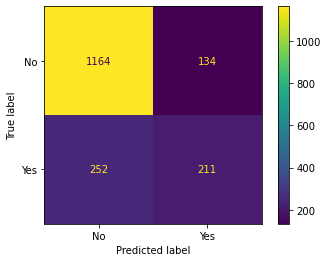

In [200]:
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# 7. Even a simple model will give us more than 70% accuracy. Why?
# The data is imbalanced and the TP ("No") are predicted relatively well, so the others do not fall so extrem in account.

In [ ]:
# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [201]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_ready,y_train)

In [202]:
lr2 = LogisticRegression(random_state=0, solver='lbfgs')
lr2.fit(X_train_SMOTE, y_train_SMOTE)
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(lr2.score(X_train_SMOTE, y_train_SMOTE)))

The accuracy of the model in the TRAIN set is: 0.74


In [203]:
y_pred_test = lr2.predict(X_test_ready)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="No")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="No")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="No")))
print("The Cohen-Kappa-Score in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test, weights="quadratic", labels=["Yes","No"])))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.88
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.79
The Cohen-Kappa-Score in the TEST set is: 0.38


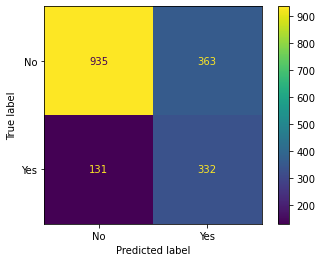

In [204]:
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [205]:
# no improvement